# Decision Tree [ Wine Dataset ]

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('Dataset/wine.csv')
df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
x=df.iloc[:,1:13]
y=df.iloc[:,0]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [16]:
from sklearn.impute import SimpleImputer
# First create an Imputer , Stratergy means what we want to write in place of missed value
mss = SimpleImputer (missing_values = np.nan, strategy = 'mean')  
 
# Set which columns imputer should perform
mss = mss.fit (x.iloc[:,[0,1,2,3,4,8,9]])
# update values of X with new values
x.iloc[:,[0,1,2,3,4,8,9]] = mss.transform(x.iloc[:,[0,1,2,3,4,8,9]])

print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [18]:
from sklearn.preprocessing import LabelEncoder
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)
y=y.reshape(-1,1)
print(y)

[1 1 1 ... 0 0 0]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5372           10.5             0.280         0.51             1.7      0.080   
1790            9.4             0.160         0.30             1.4      0.042   
5879            9.5             0.860         0.26             1.9      0.079   
1065            8.3             0.220         0.38            14.8      0.054   
852             6.9             0.180         0.36             1.3      0.036   
...             ...               ...          ...             ...        ...   
4931            6.9             0.605         0.12            10.7      0.073   
3264            5.9             0.240         0.12             1.4      0.035   
1653            7.9             0.330         0.28            31.6      0.053   
2607            8.9             0.260         0.33             8.1      0.024   
2732            7.9             0.510         0.34             2.6      0.049   

      free sulfur dioxide  

In [20]:
# # Using Min-MAx
# from sklearn.preprocessing import MinMaxScaler      # range 
# mms = MinMaxScaler()
# x_train_norm = mms.fit_transform (x_train) #fit and transform
# x_test_norm = mms.transform (x_test) # only transform

In [ ]:
# Using Scaller
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train_norm = independent_scalar.fit_transform (x_train) #fit and transform
x_test_norm = independent_scalar.transform (x_test) # only transform

In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = "entropy",max_depth=10)
decision_tree.fit(x_train_norm, y_train)
predictValues =decision_tree.predict(x_test_norm)

predictValues




array([0, 0, 1, ..., 1, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score
import numpy as np

print(accuracy_score(y_test, predictValues))


0.9846153846153847


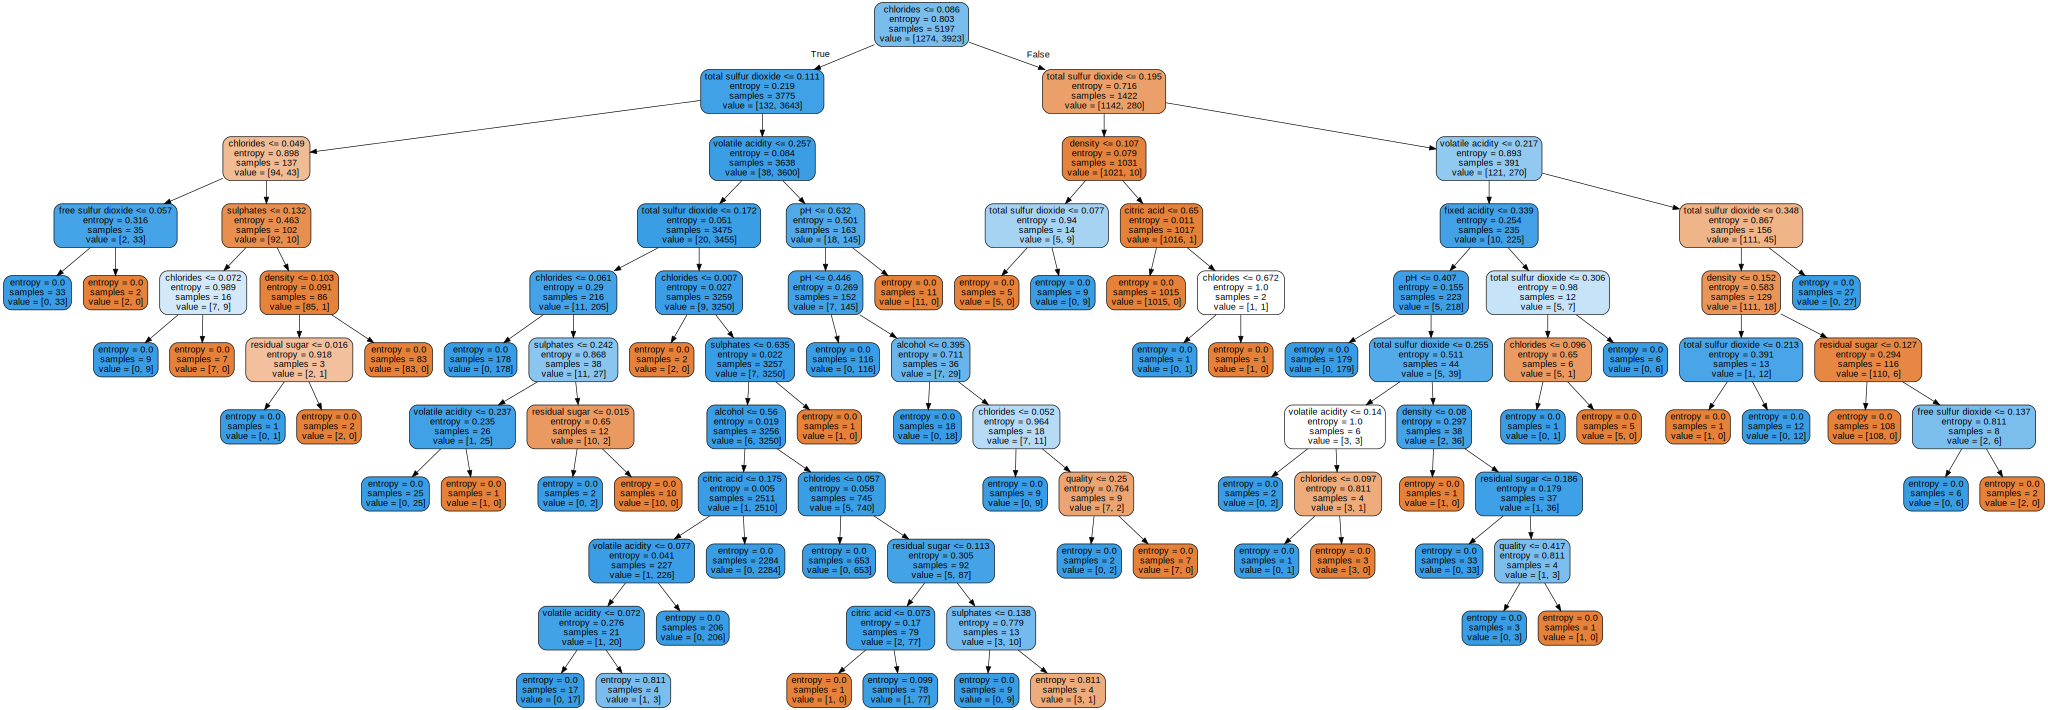

In [23]:
data_feature_names = [ 'fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
!pip install graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=data_feature_names, filled = True,rounded=True))
display(SVG(graph.pipe(format='svg')))

In [24]:
# accuracy without scalling -> 0.9869
# accuracy with Min-Max -> 0.9846
# accuracy with Scaller -> 